# Meta M1 - Filipe Silva e Gonçalo Santos

### Informação e Operações de Limpeza dos Dados

##### Importar as Bibliotecas

In [859]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

##### Carregar o Dataset com a Biblioteca Pandas

In [860]:
employee_df=pd.read_csv('Employee.csv')

##### Visualizar as Primeiras 5 Instâncias do Dataset

In [861]:
employee_df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


##### Obter as Dimenções do Dataset

In [862]:
employee_df.shape

(4653, 9)

##### Acessar os Nomes das Colunas

In [863]:
employee_df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

##### Verificar Valores em Falta no Dataset

In [864]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [865]:
employee_df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

##### Apagar Duplicados e Verificar Novamente as Dimenções do Dataset

In [866]:
employee_df.drop_duplicates(subset=None, inplace=True)
employee_df.shape

(2764, 9)

##### Principais Estatísticas das Features Numéricas

In [867]:
employee_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000



### Visualização de Dados

##### Heatmap de Correlação

<AxesSubplot: >

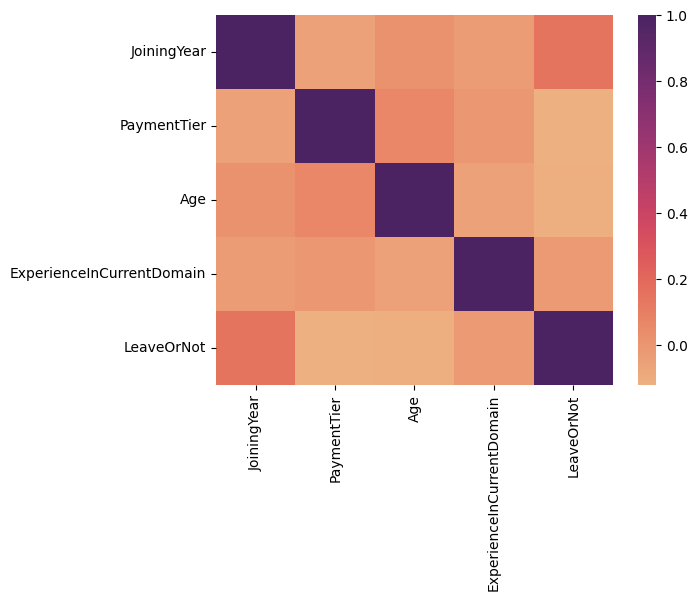

In [868]:
sns.heatmap(employee_df.corr(),cmap="flare")

##### Pie Chart % of Gender

Text(0.5, 1.0, '% of Gender')

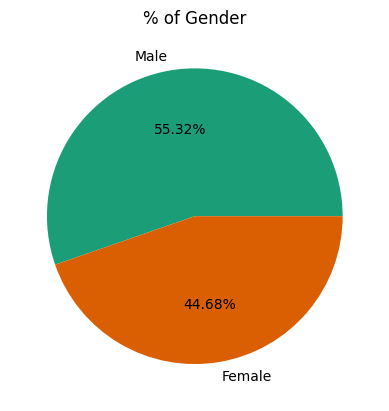

In [869]:
labels = ['Male', 'Female']
sizes = [employee_df['Gender'].value_counts()['Male'],
         employee_df['Gender'].value_counts()['Female']
        ]
colors = sns.color_palette('Dark2')[0:2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title("% of Gender")

##### Pie Chart % of Payment Tier

Text(0.5, 1.0, '% of Payment Tier')

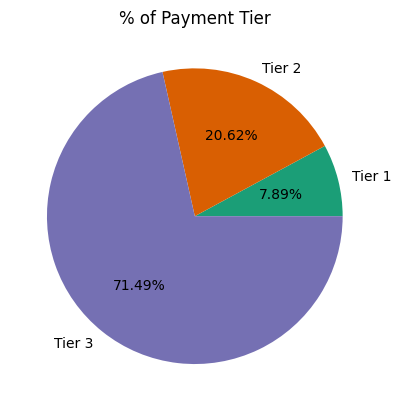

In [870]:
labels = ['Tier 1', 'Tier 2', 'Tier 3']
colors = sns.color_palette('Dark2')[0:3]
sizes = [employee_df['PaymentTier'].value_counts()[1],
         employee_df['PaymentTier'].value_counts()[2],
         employee_df['PaymentTier'].value_counts()[3]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title("% of Payment Tier")

##### Distribution of Ages Histogram

(array([  0.,   0.,  31.,  41., 161., 167., 179., 218., 365., 180., 186.,
        115., 113., 114., 118., 110., 121., 119., 117., 115., 119.,  75.,
          0.,   0.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.]),
 <BarContainer object of 24 artists>)

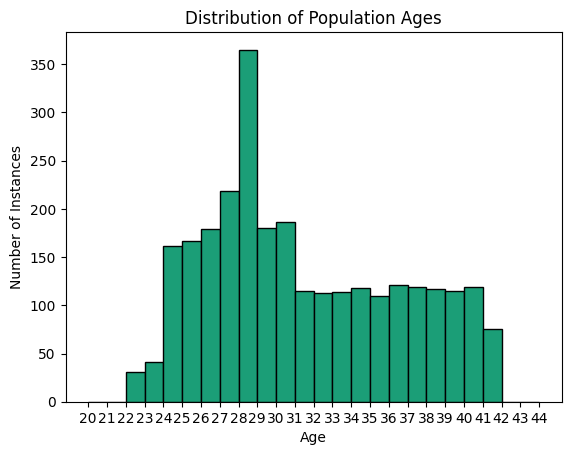

In [871]:
bins = np.arange(20, 45, 1)
color = sns.color_palette('Dark2')[0:1]
plt.title('Distribution of Population Ages')
plt.xlabel("Age")
plt.ylabel('Number of Instances')
plt.xticks(range(20,45,1))
plt.hist(employee_df['Age'], bins=bins, color=color, edgecolor='black', linewidth=1)

##### Employee Education Bar Chart

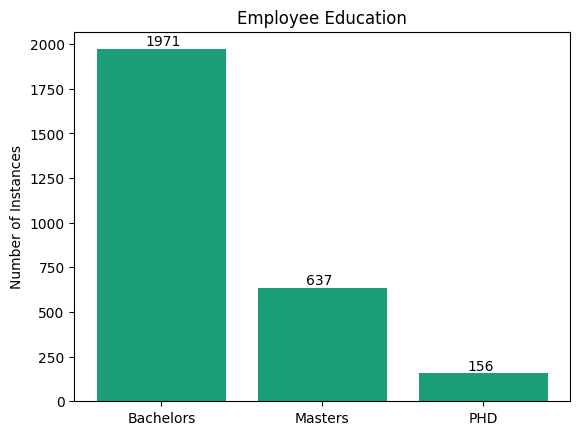

In [872]:
educationTypes=['Bachelors','Masters','PHD']
educationCount = employee_df['Education'].value_counts()['Bachelors'], employee_df['Education'].value_counts()['Masters'], employee_df['Education'].value_counts()['PHD']
plt.bar(educationTypes, educationCount, color=color)
plt.title('Employee Education')
plt.ylabel('Number of Instances')
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(educationCount):plt.text(xlocs[i] - 1.10, v+20, str(v))

##### EverBenched Countplot

[Text(0, 0, '2403'), Text(0, 0, '361')]

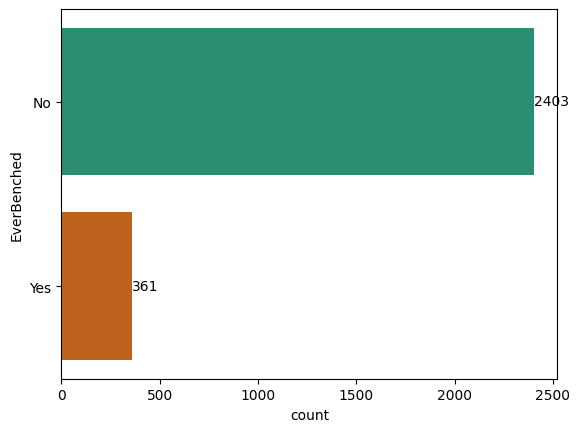

In [873]:
ax = sns.countplot(y=employee_df['EverBenched'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### EverBenched and LeaveOrNot Countplot Chart

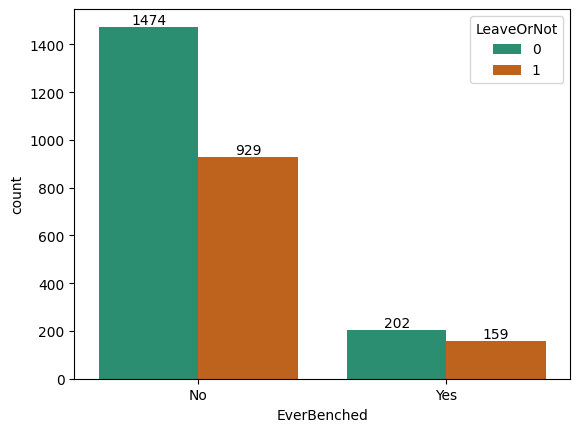

In [874]:
ax3 = sns.countplot(data = employee_df ,x='EverBenched',hue='LeaveOrNot',palette="Dark2")
for i in ax3.containers:
    ax3.bar_label(i,)

##### LeaveOrNot Countplot Chart

[Text(0, 0, '1676'), Text(0, 0, '1088')]

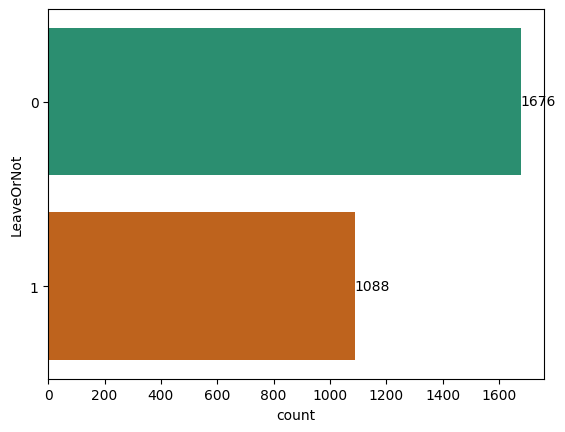

In [875]:
ax = sns.countplot(y=employee_df['LeaveOrNot'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### JoiningYear and LeaveOrNot Countplot Chart

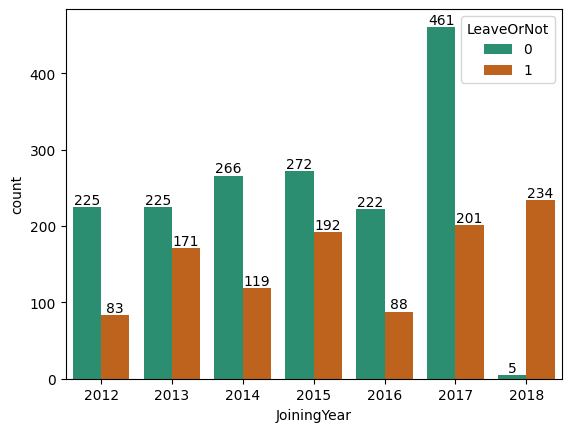

In [876]:
year_employee_df=employee_df.copy()
year_employee_df['JoiningYear'] = year_employee_df['JoiningYear'].astype('object')
ax2=sns.countplot(data = year_employee_df ,x='JoiningYear',hue='LeaveOrNot',palette='Dark2')
for i in ax2.containers:
    ax2.bar_label(i,)

##### Meter info aqui

[Text(0, 0, '287'),
 Text(0, 0, '433'),
 Text(0, 0, '681'),
 Text(0, 0, '451'),
 Text(0, 0, '425'),
 Text(0, 0, '470'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

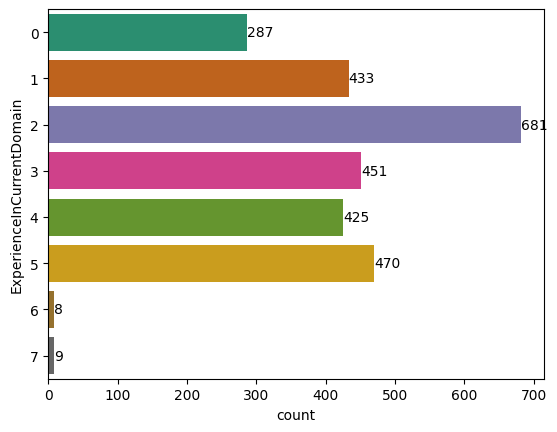

In [877]:
ax = sns.countplot(y=employee_df['ExperienceInCurrentDomain'],palette='Dark2')
ax.bar_label(ax.containers[0])

##### Meter info aqui

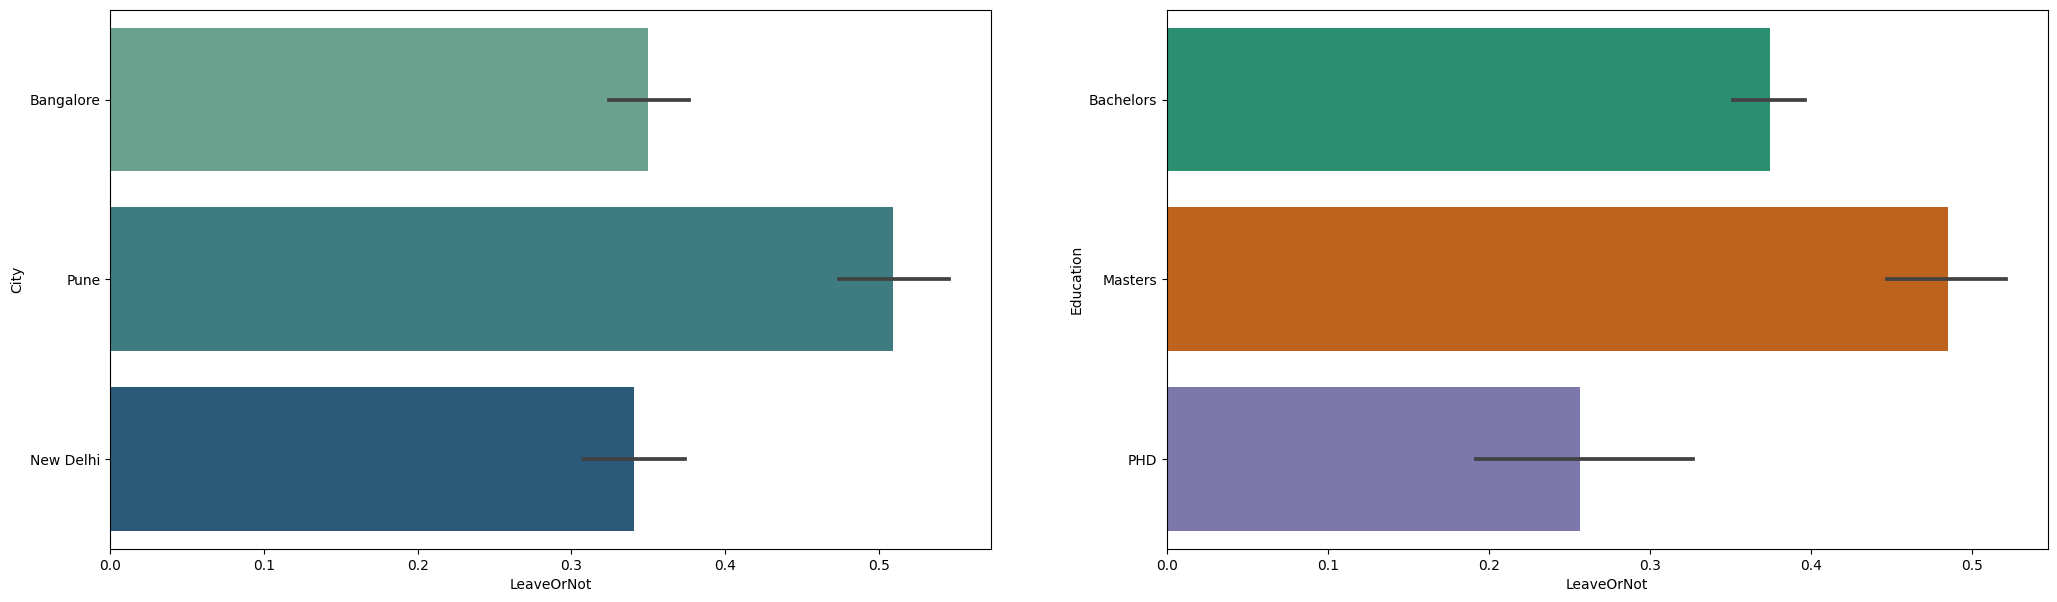

In [878]:
fig,ax=plt.subplots(1,2,figsize=(7,7))
sns.barplot(x='LeaveOrNot',y='City',data=employee_df,palette='crest',ax=ax[0])
sns.barplot(x='LeaveOrNot',y='Education',palette='Dark2',ax=ax[1],data=employee_df)
fig.set_figwidth(25)

##### Meter info aqui

<AxesSubplot: >

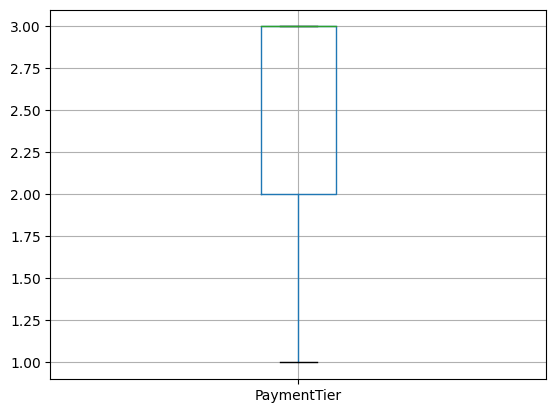

In [879]:
%matplotlib inline
num_cols = ['PaymentTier']
employee_df.boxplot(num_cols)

<AxesSubplot: >

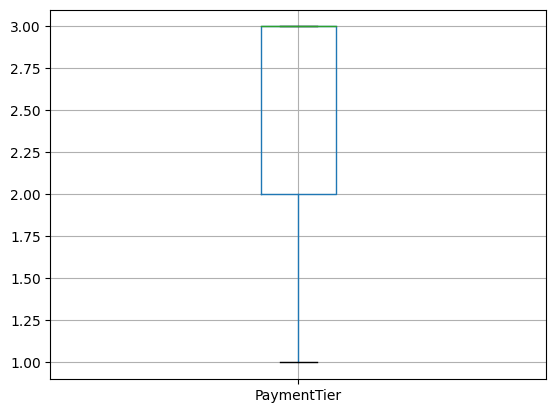

In [880]:
%matplotlib inline
num_cols = ['PaymentTier']
employee_df.boxplot(num_cols)

### Pré-Processamento de Dados

##### Criar o Dataset de Treino e de Teste Baseado numa Separação Aleatória de 80%/20%

In [881]:
x = employee_df.drop('LeaveOrNot',axis=1).copy()
y = employee_df[['LeaveOrNot']].copy()

In [882]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

employee_df_num=x[['JoiningYear', 'Age', 'ExperienceInCurrentDomain']].copy()
employee_df_ord=x[['Education', 'PaymentTier']].copy()
employee_df_cat=x[['City', 'Gender', 'EverBenched']].copy()

attr_num = employee_df_num.columns
attr_ord = employee_df_ord.columns
attr_cat = employee_df_cat.columns

global_pipeline=ColumnTransformer([
    ('num', StandardScaler(),attr_num),
    ('ord', OrdinalEncoder(), attr_ord),
    ('cat', OneHotEncoder(),attr_cat)
])
train_preprocessed=global_pipeline.fit_transform(x)


In [883]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(train_preprocessed, y, test_size=0.2, random_state=2)

# Meta M2 - Filipe Silva e Gonçalo Santos

### Supervised and Unsupervised Learning

#### Supervised Learning

##### SVM (Support Vector Machines)

In [884]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf=Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1.0, loss='hinge'))
])

In [885]:
svm_clf.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge'))])

In [886]:
y_pred=svm_clf.predict(x_test)

In [887]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('Cross-validation:')
cross_val = cross_val_score(svm_clf,x_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.7
Precision: 0.7
Recall: 0.43
F1: 0.53
Cross-validation:
Accuracy:  [0.58108108 0.67420814 0.71493213 0.66968326 0.61538462 0.62443439
 0.66515837 0.66063348 0.71040724 0.66515837]
Accuracy Mean: 0.658108108108108


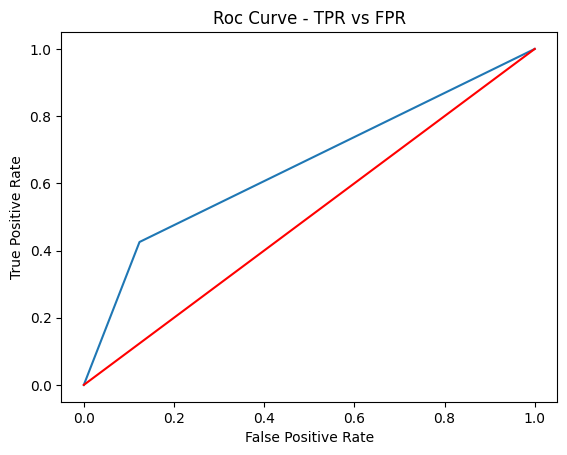

In [888]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

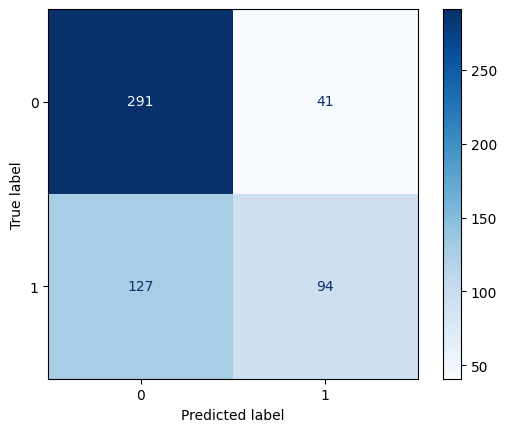

In [889]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (svm_clf,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

##### Decision Tree

In [890]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=7, random_state=2)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=2)

[Text(0.7340745192307693, 0.9375, 'X[0] <= 1.278\ngini = 0.477\nsamples = 2211\nvalue = [1344, 867]'),
 Text(0.5162259615384616, 0.8125, 'X[4] <= 1.5\ngini = 0.45\nsamples = 2035\nvalue = [1339, 696]'),
 Text(0.28365384615384615, 0.6875, 'X[7] <= 0.5\ngini = 0.499\nsamples = 621\nvalue = [296, 325]'),
 Text(0.15384615384615385, 0.5625, 'X[4] <= 0.5\ngini = 0.471\nsamples = 339\nvalue = [210, 129]'),
 Text(0.07692307692307693, 0.4375, 'X[0] <= -0.843\ngini = 0.347\nsamples = 121\nvalue = [94, 27]'),
 Text(0.038461538461538464, 0.3125, 'X[1] <= -1.068\ngini = 0.46\nsamples = 39\nvalue = [25, 14]'),
 Text(0.019230769230769232, 0.1875, 'X[2] <= -0.09\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.009615384615384616, 0.0625, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.028846153846153848, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.057692307692307696, 0.1875, 'X[1] <= 0.694\ngini = 0.383\nsamples = 31\nvalue = [23, 8]'),
 Text(0.04807692307692308, 0.0625, 'gi

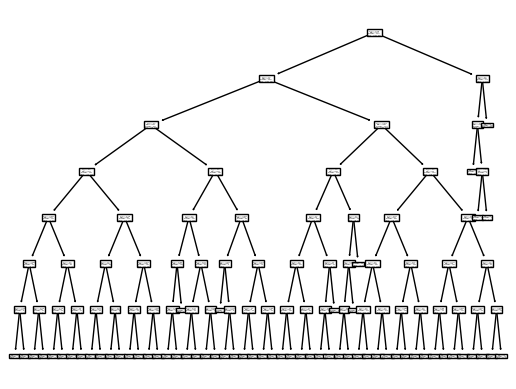

In [891]:
from sklearn.tree import plot_tree
plot_tree(tree_clf)

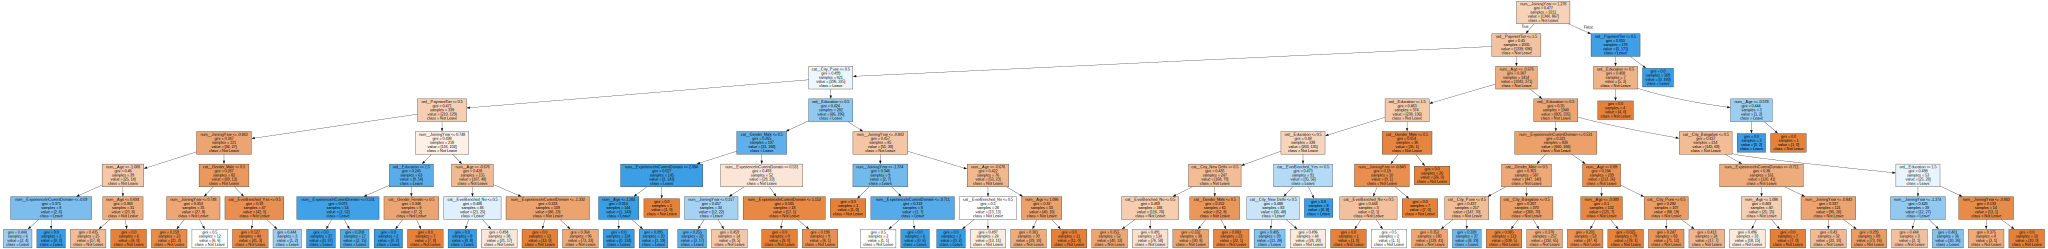

In [892]:
import graphviz
from sklearn.tree import export_graphviz

feature_names_df = pd.DataFrame(global_pipeline.fit_transform(x), columns=global_pipeline.get_feature_names_out())
feature_names = list(feature_names_df.columns)

dot_data=export_graphviz(tree_clf, feature_names=feature_names,
                        class_names=['Not Leave', 'Leave'],
                        filled=True)
graph=graphviz.Source(dot_data)
graph

In [893]:
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2)) 

from sklearn.model_selection import cross_val_score
print('Cross-validation:')
cross_val = cross_val_score(tree_clf,x_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.7
Precision: 0.7
Recall: 0.43
F1-score: 0.53
Cross-validation:
Accuracy:  [0.78828829 0.83257919 0.7918552  0.80542986 0.8280543  0.76470588
 0.77828054 0.81447964 0.78280543 0.79638009]
Accuracy Mean: 0.7982858424034894


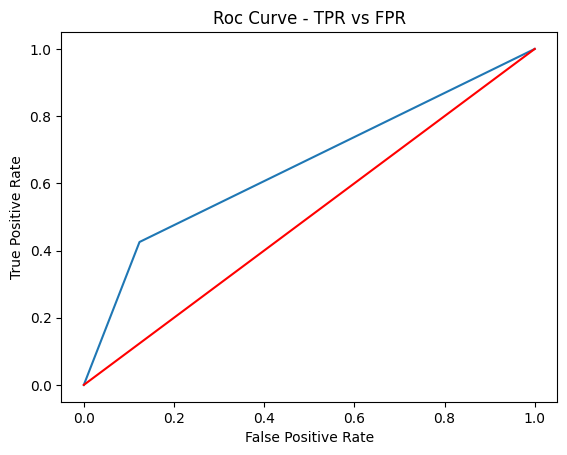

In [894]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

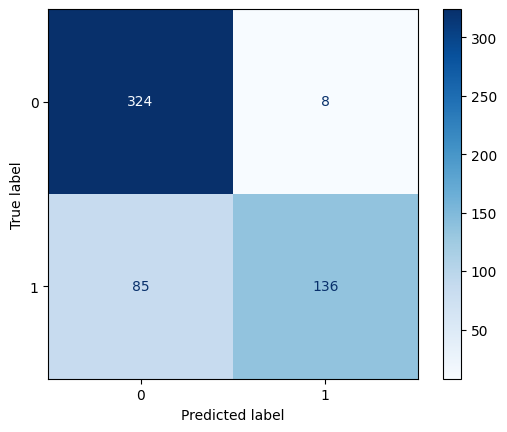

In [895]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (tree_clf,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

##### Random Forest

In [896]:
from sklearn.ensemble import RandomForestClassifier
rf_Model=RandomForestClassifier(n_estimators=17)
rf_Model.fit(x_train, y_train)
y_pred=rf_Model.predict(x_test)

In [897]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('Cross-validation:')
cross_val = cross_val_score(rf_Model,x_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)

Accuracy: 0.73
Precision: 0.68
Recall: 0.63
F1-score: 0.65
Cross-validation:
Accuracy:  [0.68018018 0.72850679 0.7239819  0.70588235 0.71945701 0.71493213
 0.68778281 0.74208145 0.67873303 0.68778281]


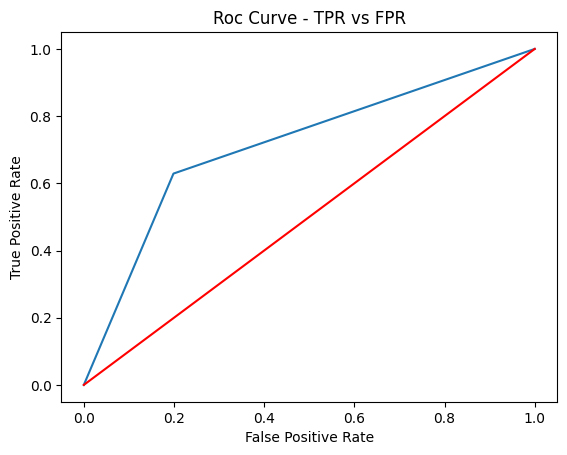

In [898]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

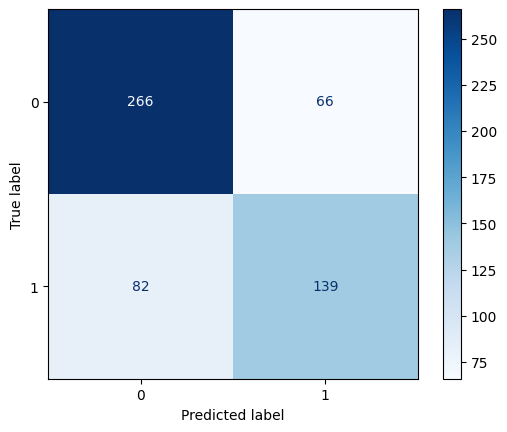

In [899]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (rf_Model,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

In [900]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(10,100,4)]
max_features = ['auto', 'sqrt']
max_depth = [2, 7]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [901]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(rf_Model, param_grid, cv=10)

In [902]:
rf_Grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=17),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 7],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 40, 70, 100]})

In [903]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [904]:
y_pred=rf_Grid.predict(x_test)

In [905]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('Cross-validation:')
cross_val = cross_val_score(rf_Model,x_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.82
Precision: 0.92
Recall: 0.59
F1-score: 0.72
Cross-validation:
Accuracy:  [0.71171171 0.73755656 0.7239819  0.7239819  0.74660633 0.70588235
 0.71945701 0.760181   0.68778281 0.71040724]
Accuracy Mean: 0.7227548815784111


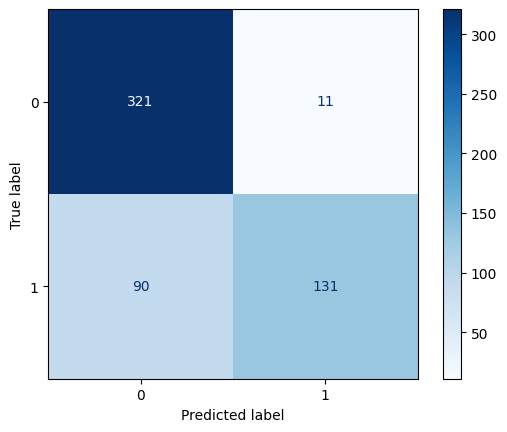

In [906]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (rf_Grid,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

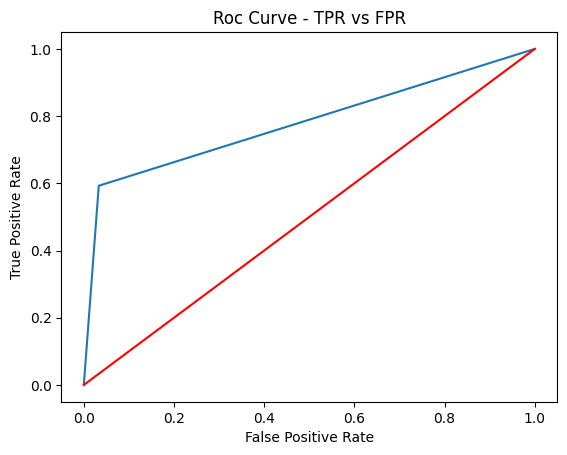

In [907]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

##### Naive Bayes Gaussiano

In [908]:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(x_train, y_train)
y_pred=gNB.predict(x_test)

In [909]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('')
print('Cross-validation:')
cross_val = cross_val_score(gNB,x_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.69
Precision: 0.63
Recall: 0.52
F1-score: 0.57

Cross-validation:
Accuracy:  [0.64864865 0.66063348 0.66968326 0.65158371 0.71040724 0.61538462
 0.63348416 0.64253394 0.68778281 0.66515837]
Accuracy Mean: 0.6585300232359057


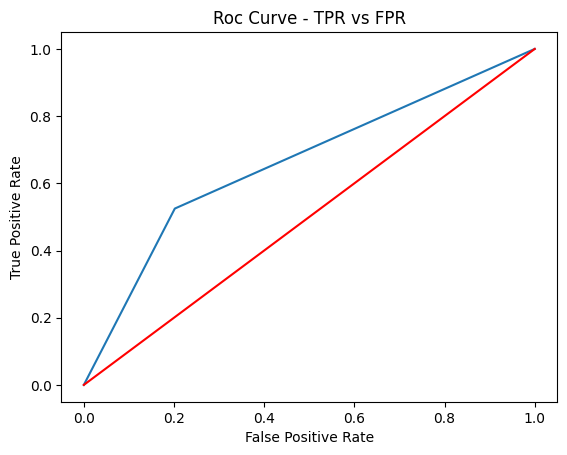

In [910]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

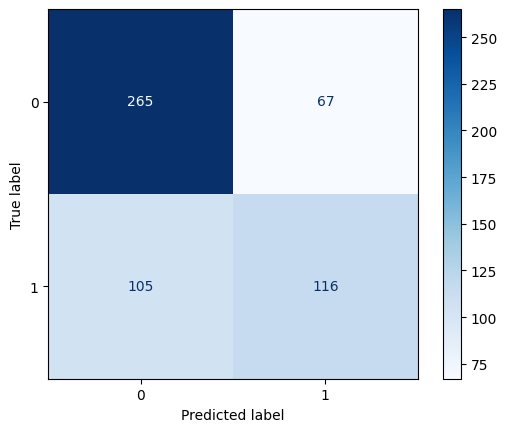

In [911]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (gNB,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

##### Naive Bayes Multinomial

In [912]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(x_train)
xt_train = est.transform(x_train)
xt_test = est.transform(x_test)

from sklearn.naive_bayes import MultinomialNB
mnNB = MultinomialNB()
mnNB.fit(xt_train, y_train)

MultinomialNB()

In [913]:
y_pred=mnNB.predict(xt_test)

In [914]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('')
print('Cross-validation:')
cross_val = cross_val_score(mnNB,xt_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.66
Precision: 0.61
Recall: 0.43
F1-score: 0.5

Cross-validation:
Accuracy:  [0.63963964 0.64253394 0.63348416 0.63348416 0.66968326 0.59728507
 0.63800905 0.65158371 0.67873303 0.64253394]
Accuracy Mean: 0.6426969956381722


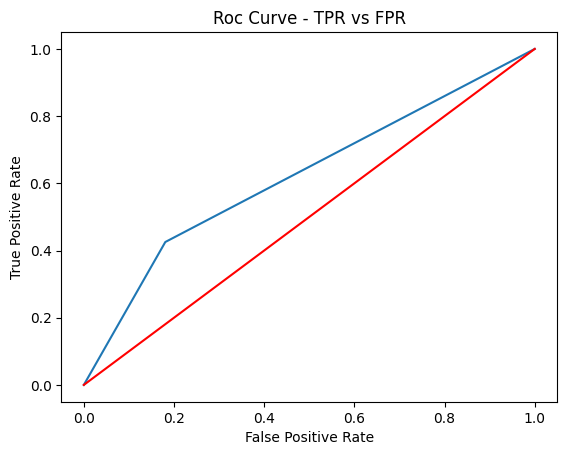

In [915]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

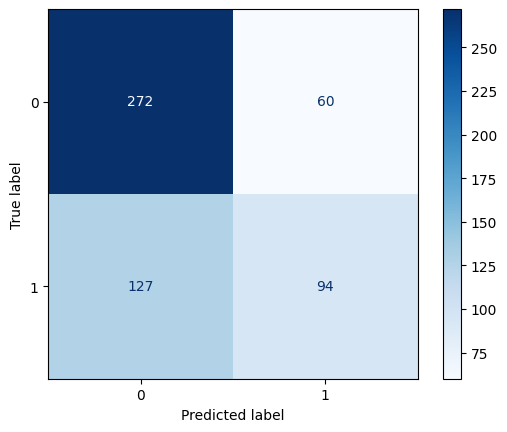

In [916]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (mnNB,
                                              xt_test, y_test,    
                                              cmap=plt.cm.Blues)

##### KNN

In [917]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [918]:
y_pred=knn_clf.predict(x_test)

In [919]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
print('Precision:', precision_score(y_test,y_pred).round(2))
print('Recall:', recall_score(y_test,y_pred).round(2))
print('F1-score:', f1_score(y_test,y_pred).round(2))

from sklearn.model_selection import cross_val_score
print('')
print('Cross-validation:')
cross_val = cross_val_score(mnNB,xt_train,y_train,scoring="accuracy", cv=10)
print('Accuracy: ',cross_val)
print('Accuracy Mean:',np.mean(cross_val))

Accuracy: 0.75
Precision: 0.83
Recall: 0.47
F1-score: 0.6

Cross-validation:
Accuracy:  [0.63963964 0.64253394 0.63348416 0.63348416 0.66968326 0.59728507
 0.63800905 0.65158371 0.67873303 0.64253394]
Accuracy Mean: 0.6426969956381722


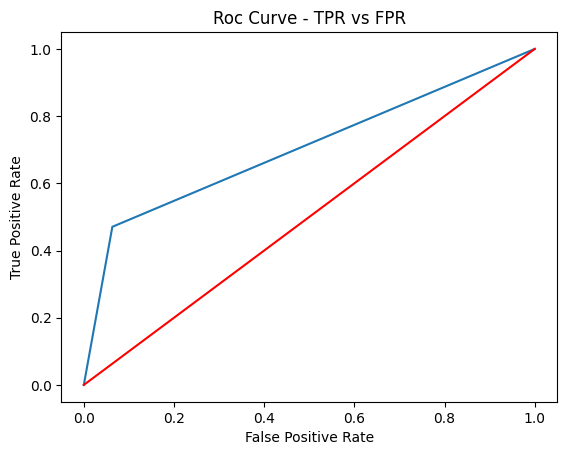

In [920]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve - TPR vs FPR')

plot_roc_curve(fpr,tpr)

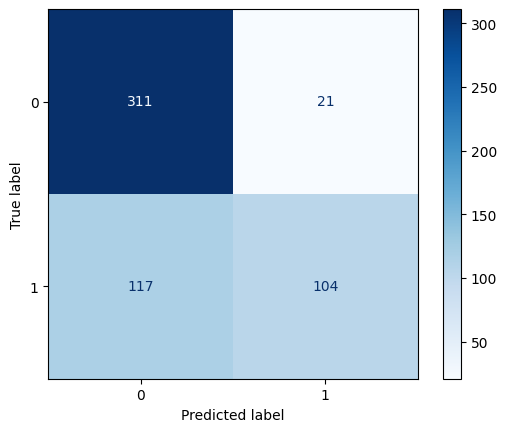

In [921]:
from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (knn_clf,
                                              x_test, y_test,    
                                              cmap=plt.cm.Blues)

##### Voting Ensemble

In [922]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(
    estimators=[('dt',tree_clf),('rf',rf_Model),('knn',knn_clf)],
    voting='hard'
)
for clf in (tree_clf, rf_Model, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__)
    print('Accuracy:', accuracy_score(y_test,y_pred).round(2))
    print('Precision:', precision_score(y_test,y_pred).round(2))
    print('Recall:', recall_score(y_test,y_pred).round(2))
    print('F1-score:', f1_score(y_test,y_pred).round(2))
    print('*******')
    

DecisionTreeClassifier
Accuracy: 0.83
Precision: 0.94
Recall: 0.62
F1-score: 0.75
*******
RandomForestClassifier
Accuracy: 0.75
Precision: 0.7
Recall: 0.64
F1-score: 0.67
*******
KNeighborsClassifier
Accuracy: 0.75
Precision: 0.83
Recall: 0.47
F1-score: 0.6
*******
VotingClassifier
Accuracy: 0.81
Precision: 0.88
Recall: 0.61
F1-score: 0.72
*******


In [923]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(
    estimators=[('dt',tree_clf),('rf',rf_Model),('knn',knn_clf)],
    voting='hard'
)

for clf in (tree_clf, rf_Model, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred).round(3))

DecisionTreeClassifier 0.832
RandomForestClassifier 0.736
KNeighborsClassifier 0.75
VotingClassifier 0.812


#### Unsupervised Learning

##### K-Means

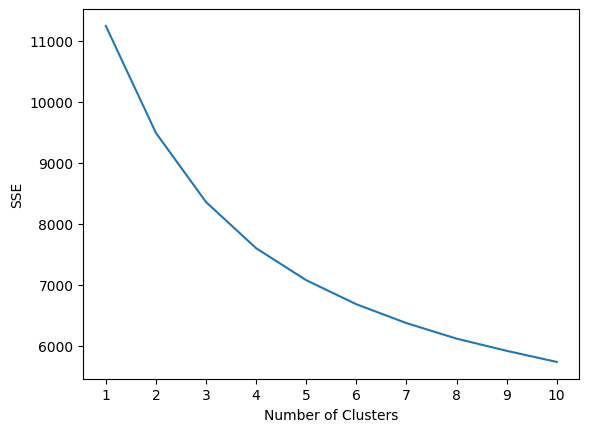

In [924]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 2,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [925]:
#Before K-Means Preprocessing
print('Before K-Means Preprocessing:')
print(' ')

#SVM (Support Vector Machines):
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf=Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1.0, loss='hinge'))
])
svm_clf.fit(x_train,y_train)
svm_clf_score=svm_clf.score(x_test,y_test)
print('SVM Score: ', svm_clf_score)

#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=7,random_state=2)
tree_clf.fit(x_train, y_train)
tree_clf_score=tree_clf.score(x_test,y_test)
print('Decision Tree Score: ', tree_clf_score)

#Random Forest:
from sklearn.ensemble import RandomForestClassifier
rf_Model=RandomForestClassifier(bootstrap=True, max_depth=7, max_features="auto", min_samples_leaf=1, min_samples_split=5, n_estimators=10)
rf_Model.fit(x_train, y_train)
rf_Model_score=rf_Model.score(x_test,y_test)
print('Random Forest Score: ', rf_Model_score)

#Naive Bayes Gaussiano:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(x_train, y_train)
gNB_score=gNB.score(x_test,y_test)
print('Naive Bayes Gaussiano Score: ', gNB_score)

#Naive Bayes Multinomial:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(x_train)
xt_train = est.transform(x_train)
xt_test = est.transform(x_test)

from sklearn.naive_bayes import MultinomialNB
mnNB = MultinomialNB()
mnNB.fit(xt_train, y_train)
mnNB_score=mnNB.score(xt_test,y_test)
print('Naive Bayes Multinomial Score: ', mnNB_score)

#KNN:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train, y_train)
knn_clf_score=knn_clf.score(x_test,y_test)
print('KNN Score: ', knn_clf_score)
print(' ')

#KMeans for Preprocessing:
from sklearn.cluster import KMeans
print('After K-Means Preprocessing:')
print(' ')

#SVM (Support Vector Machines):
svm_clf_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("svm_clf", Pipeline([
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1.0,loss='hinge')),
            ]))
])
svm_clf_kmeans.fit(x_train, y_train)
svm_clf_kmeans_score=svm_clf_kmeans.score(x_test,y_test)
print('SVM Score after K-Means: ', svm_clf_kmeans_score)

#Decision Tree:
tree_clf_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("tree_clf", DecisionTreeClassifier(max_depth=7,random_state=2))
])
tree_clf_kmeans.fit(x_train, y_train)
tree_clf_kmeans_score=tree_clf_kmeans.score(x_test,y_test)
print('Decision Tree Score after K-Means: ', tree_clf_kmeans_score)

#Random Forest:
rf_Model_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("rf_Model", RandomForestClassifier(bootstrap=True, max_depth=7, max_features="auto", min_samples_leaf=1, min_samples_split=5, n_estimators=10))
])
rf_Model_kmeans.fit(x_train, y_train)
rf_Model_kmeans_score=rf_Model_kmeans.score(x_test,y_test)
print('Random Forest Score after K-Means: ', rf_Model_kmeans_score)

#Naive Bayes Gaussiano:
gNB_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("gNB", GaussianNB())
])
gNB_kmeans.fit(x_train, y_train)
gNB_kmeans_score=gNB_kmeans.score(x_test,y_test)
print('Naive Bayes - Gaussian Score after K-Means: ', gNB_kmeans_score)

#Naive Bayes Multinomial:
mnNB_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("mnNB", MultinomialNB())
])
mnNB_kmeans.fit(xt_train, y_train)
mnNB_kmeans_score=mnNB_kmeans.score(xt_test,y_test)
print('Naive Bayes - Multinomial Score after K-Means: ', mnNB_kmeans_score)

#KNN:
knn_clf_kmeans=Pipeline([
    ("kmeans", KMeans(init="random", n_clusters=3, n_init=10, random_state=2)),
    ("knn_clf", KNeighborsClassifier(n_neighbors=14))
])
knn_clf_kmeans.fit(x_train, y_train)
knn_clf_kmeans_score=knn_clf_kmeans.score(x_test,y_test)
print('KNN Score after K-Means: ', knn_clf_kmeans_score)

Before K-Means Preprocessing:
 
SVM Score:  0.6925858951175407
Decision Tree Score:  0.8318264014466547
Random Forest Score:  0.810126582278481
Naive Bayes Gaussiano Score:  0.6889692585895117
Naive Bayes Multinomial Score:  0.6618444846292948
KNN Score:  0.7504520795660036
 
After K-Means Preprocessing:
 
SVM Score after K-Means:  0.6003616636528029
Decision Tree Score after K-Means:  0.6853526220614828
Random Forest Score after K-Means:  0.6726943942133815
Naive Bayes - Gaussian Score after K-Means:  0.6636528028933092
Naive Bayes - Multinomial Score after K-Means:  0.6003616636528029
KNN Score after K-Means:  0.6618444846292948


In [926]:
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score
brc = Birch(n_clusters=4)
brc.fit(x_train,y_train)
y_pred=brc.predict(x_test)
print('Initial Birch Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print(' ')
print('Before Birch Clustering Preprocessing:')
print(' ')

#SVM (Support Vector Machines):
svm_clf=Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1.0, loss='hinge'))
])
svm_clf.fit(x_train,y_train)
svm_clf_score=svm_clf.score(x_test,y_test)
print('SVM Score: ', svm_clf_score)

#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=7,random_state=2)
tree_clf.fit(x_train, y_train)
tree_clf_score=tree_clf.score(x_test,y_test)
print('Decision Tree Score: ', tree_clf_score)

#Random Forest:
from sklearn.ensemble import RandomForestClassifier
rf_Model=RandomForestClassifier(bootstrap=True, max_depth=7, max_features="auto", min_samples_leaf=1, min_samples_split=5, n_estimators=10)
rf_Model.fit(x_train, y_train)
rf_Model_score=rf_Model.score(x_test,y_test)
print('Random Forest Score: ', rf_Model_score)

#Naive Bayes Gaussiano:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(x_train, y_train)
gNB_score=gNB.score(x_test,y_test)
print('Naive Bayes Gaussiano Score: ', gNB_score)

#Naive Bayes Multinomial:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(x_train)
xt_train = est.transform(x_train)
xt_test = est.transform(x_test)
from sklearn.naive_bayes import MultinomialNB
mnNB = MultinomialNB()
mnNB.fit(xt_train, y_train)
mnNB_score=mnNB.score(xt_test,y_test)
print('Naive Bayes Multinomial Score: ', mnNB_score)

#KNN:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf_score=knn_clf.score(x_test,y_test)
print('KNN Score: ', knn_clf_score)
print(' ')

#BIRCH Clustering for Preprocessing:
print('After Birch Preprocessing:')
print(' ')

#SVM (Support Vector Machines):
svm_clf_birch=Pipeline([
      ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
      ("svm_clf", Pipeline([
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1.0,loss='hinge')),
            ]))
  ])
svm_clf_birch.fit(x_train, y_train)
svm_clf_birch_score=svm_clf_birch.score(x_test,y_test)
print('SVM Score after Birch: ', svm_clf_birch_score)

#Decision Tree:
tree_clf_birch=Pipeline([
    ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
    ("tree_clf", DecisionTreeClassifier(max_depth=7,random_state=2))
])
tree_clf_birch.fit(x_train, y_train)
tree_clf_birch_score=tree_clf_birch.score(x_test,y_test)
print('Decision Tree Score after Birch: ', tree_clf_birch_score)

#Random Forest:
rf_Model_birch=Pipeline([
    ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
    ("rf_Model", RandomForestClassifier(bootstrap=True, max_depth=7, max_features="auto", min_samples_leaf=1, min_samples_split=5, n_estimators=10))
])
rf_Model_birch.fit(x_train, y_train)
rf_Model_birch_score=rf_Model_birch.score(x_test,y_test)
print('Random Forest Score after Birch: ', rf_Model_birch_score)

#Naive Bayes Gaussiano:
gNB_birch=Pipeline([
    ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
    ("gNB", GaussianNB())
])
gNB_birch.fit(x_train, y_train)
gNB_birch_score=gNB_birch.score(x_test,y_test)
print('Naive Bayes - Gaussian Score after Birch: ', gNB_birch_score)

#Naive Bayes Multinomial:
mnNB_birch=Pipeline([
    ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
    ("mnNB", MultinomialNB())
])
mnNB_birch.fit(xt_train, y_train)
mnNB_birch_score=mnNB_birch.score(xt_test,y_test)
print('Naive Bayes - Multinomial Score after Birch: ', mnNB_birch_score)

#KNN:
knn_clf_birch=Pipeline([
    ("birch", Birch(branching_factor=50, n_clusters=3, threshold=1.5)),
    ("knn_clf", KNeighborsClassifier(n_neighbors=14))
])
knn_clf_birch.fit(x_train, y_train)
knn_clf_birch_score=knn_clf_birch.score(x_test,y_test)
print('KNN Score after Birch: ', knn_clf_birch_score)
print(' ')

Initial Birch Accuracy: 0.280
 
Before Birch Clustering Preprocessing:
 
SVM Score:  0.6943942133815552
Decision Tree Score:  0.8318264014466547
Random Forest Score:  0.8065099457504521
Naive Bayes Gaussiano Score:  0.6889692585895117
Naive Bayes Multinomial Score:  0.6618444846292948
KNN Score:  0.701627486437613
 
After Birch Preprocessing:
 
SVM Score after Birch:  0.6962025316455697
Decision Tree Score after Birch:  0.7269439421338155
Random Forest Score after Birch:  0.7215189873417721
Naive Bayes - Gaussian Score after Birch:  0.6763110307414105
Naive Bayes - Multinomial Score after Birch:  0.6564195298372514
KNN Score after Birch:  0.7486437613019892
 
